In [1]:
using DIVAnd
using PyPlot
using NCDatasets
using DataStructures
using Dates
using Statistics
     

In [2]:
using NCDatasets
nc_file = "/tube1/cha674/CARS_2022_ancillary_data/Synthetic_WOD/2018/synthetic_wod_2018_pfl.nc"
ds = Dataset(nc_file)

NCDataset: /tube1/cha674/CARS_2022_ancillary_data/Synthetic_WOD/2018/synthetic_wod_2018_pfl.nc
Group: /

Dimensions
   casts = 17324
   depth = 54

Variables
  longitude   (17324)
    Datatype:    Float32
    Dimensions:  casts
    Attributes:
     _FillValue           = NaN

  latitude   (17324)
    Datatype:    Float32
    Dimensions:  casts
    Attributes:
     _FillValue           = NaN

  time   (17324)
    Datatype:    Int64
    Dimensions:  casts
    Attributes:
     units                = nanoseconds since 2018-01-01 00:59:02.760264704
     calendar             = proleptic_gregorian

  casts   (17324)
    Datatype:    Int64
    Dimensions:  casts

  depth   (54)
    Datatype:    Float64
    Dimensions:  depth
    Attributes:
     _FillValue           = NaN

  temp   (54 × 17324)
    Datatype:    Float64
    Dimensions:  depth × casts
    Attributes:
     _FillValue           = NaN



In [3]:
obslon = ds["longitude"].var[:,:]
obslat = ds["latitude"].var[:,:]
obsval = ds["temp"].var[1,:]
obsdepth = ds["depth"].var[1]
obstime  = ds["time"].var[:,:]

┌ Warning: unknown units nanoseconds
└ @ NCDatasets /tube1/cha674/Anaconda_Install/miniconda/envs/julia/share/julia/packages/NCDatasets/h1epE/src/cfvariable.jl:407


17324-element Vector{Int64}:
                 0
    -3373920283648
     1014479792128
     1183679437824
     2026079857664
     5233679759360
     7088399612928
    10295280468992
     8945280468992
     9449999678464
     9788399612928
    12488400900096
    11307239735296
                 ⋮
 31514233681690624
 31512714483654656
 31517269199001600
 31519295280468992
 31521657239735296
 31523849995815936
 31524019199001600
 31525707239735296
 31525369199001600
 31525876087582720
 31525538391887872
 31530433681690624

In [5]:
deleteat!(obslon, findall(isnan.(obsval)) )
deleteat!(obslat, findall(isnan.(obsval)) )
deleteat!(obstime, findall(isnan.(obsval)) )
#deleteat!(obsid, findall(isnan.(obsval)) )
deleteat!(obsval, findall(isnan.(obsval)) )
obsid =[0:length(obslon):1]

1-element Vector{StepRange{Int64, Int64}}:
 0:17312:0

In [6]:
@show size(obsval)
@show size(obslat)

size(obsval) = (17312,)
size(obslat) = (17312,)


(17312,)

In [7]:
checkobs((obslon,obslat,obsdepth,obstime),obsval,obsid)

              minimum and maximum of obs. dimension 1: (-269.99402f0, -180.003f0)
              minimum and maximum of obs. dimension 2: (-49.9986f0, -0.002f0)
              minimum and maximum of obs. dimension 3: (0.5412807464599609, 0.5412807464599609)
              minimum and maximum of obs. dimension 4: (-3373920283648, 31530433681690624)


┌ Info: Checking ranges for dimensions and observations
└ @ DIVAnd /tube1/cha674/Anaconda_Install/miniconda/envs/julia/share/julia/packages/DIVAnd/MV3j9/src/obsstat.jl:77


                          minimum and maximum of data: (0.0, 31.455183029174805)


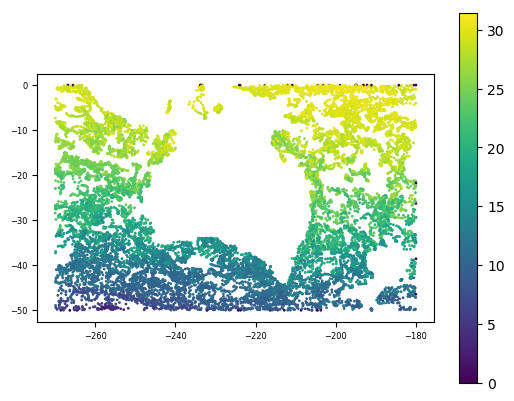

PyObject <matplotlib.colorbar.Colorbar object at 0x7f7bfcb2bb70>

In [10]:

figure("Synth-WOD")
ax = subplot(1,1,1)
scatter(obslon, obslat, c=obsval, s=1)
aspectratio = 1/cos(mean(obslat) * pi/180)
ax.tick_params("both",labelsize=6)
gca().set_aspect(aspectratio)
colorbar(orientation="vertical")


In [11]:
bathname = "/tube1/cha674/cars-v2/notebooks/gebco_30sec_16.nc"
bathisglobal = true

dx = 0.5 # longitude resolution in degrees
dy = 0.5 # latitude resolution in degrees

lonr = -270.:dx:-180.; # the range of longitudes (start:step:end)
latr = -50.:dy:0.; # the range of latitudes (start:step:end)

bx,by,b = extract_bath(bathname,true,lonr,latr)


(-270.5999999999948:0.13333333333332575:-179.4, -50.59999999999805:0.13333333333333997:0.6000000000044992, [4059.3125 4077.8203125 … 3669.8203125 3215.8515625; 3981.33984375 4181.8515625 … 3460.91796875 2797.3125; … ; 4661.52734375 4491.2421875 … 5470.984375 5483.15234375; 4570.25390625 4523.3515625 … 5517.64453125 5459.37890625])

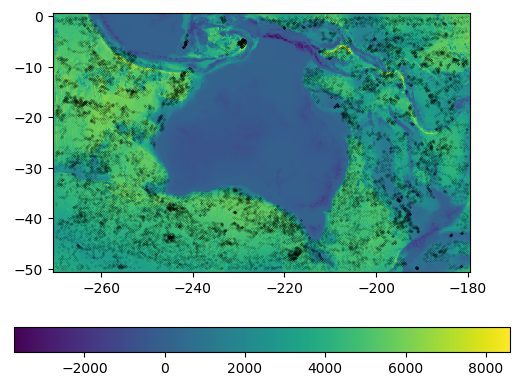

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7bf19f5e10>

In [12]:
pcolor(bx, by, b'); 
colorbar(orientation="horizontal")
ax = gca()
ax.set_aspect(1/cos(mean([ylim()...]) * pi/180))
plot(obslon, obslat, "ko", markersize=.1, markerfacecolor="k")


In [15]:
mask,(pm,pn),(xi,yi) = DIVAnd_rectdom(lonr,latr)

(Bool[1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1], ([2.0 2.0 … 2.0 2.0; 2.0 2.0 … 2.0 2.0; … ; 2.0 2.0 … 2.0 2.0; 2.0 2.0 … 2.0 2.0], [2.0 2.0 … 2.0 2.0; 2.0 2.0 … 2.0 2.0; … ; 2.0 2.0 … 2.0 2.0; 2.0 2.0 … 2.0 2.0]), ([-270.0 -270.0 … -270.0 -270.0; -269.5 -269.5 … -269.5 -269.5; … ; -180.5 -180.5 … -180.5 -180.5; -180.0 -180.0 … -180.0 -180.0], [-50.0 -49.5 … -0.5 0.0; -50.0 -49.5 … -0.5 0.0; … ; -50.0 -49.5 … -0.5 0.0; -50.0 -49.5 … -0.5 0.0]))

In [16]:
bx,by,b = load_bath(bathname,true,lonr,latr)
depthr=0
mask = falses(size(b,1),size(b,2))

for k = 1:length(depthr)
    for j = 1:size(b,2)
        for i = 1:size(b,1)
            mask[i,j] = b[i,j] >= depthr[k]
        end
    end
end
@show typeof(mask)

typeof(mask) = BitMatrix


BitMatrix (alias for BitArray{2})

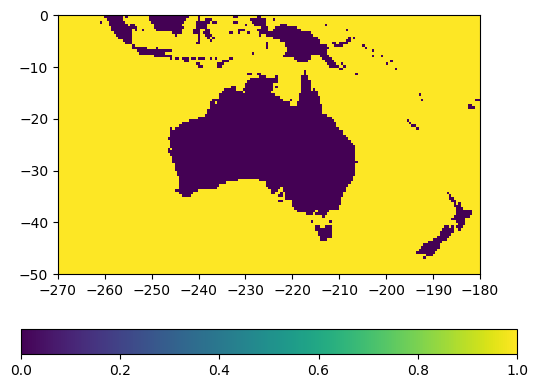

In [18]:
pcolor(bx,by,Float64.(mask[:,:]'))
colorbar(orientation="horizontal")
gca().set_aspect(1/cos(mean([ylim()...]) * pi/180)) # fixes the aspect ratio


In [20]:
len = 0.5
epsilon2 = 100.0

fi,s = DIVAndrun(mask,(pm,pn),(xi,yi),(obslon,obslat),obsval.-mean(obsval),
            len,epsilon2;alphabc=0);


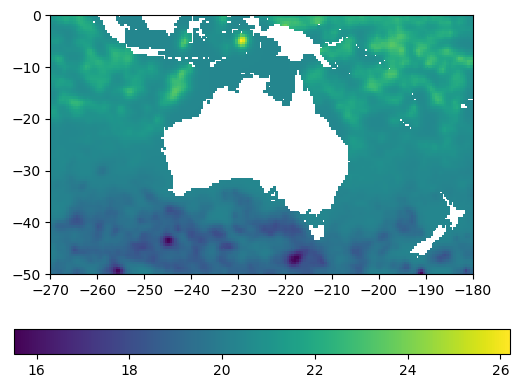

In [21]:
pcolor(xi, yi, fi .+ mean(obsval) ); 
colorbar(orientation="horizontal")
ax = gca()
ax.set_aspect(1/cos(mean([ylim()...]) * pi/180))
#plot(obslon, obslat, "ko", markersize=.1, markerfacecolor="k")

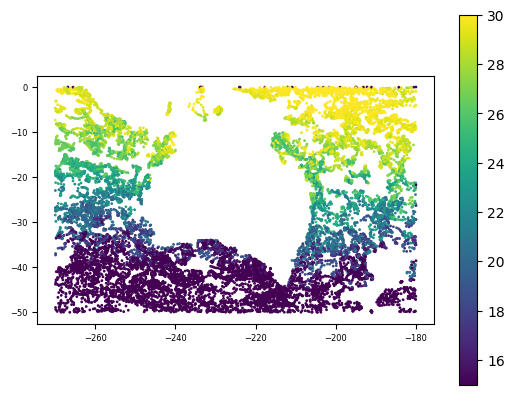

PyObject <matplotlib.colorbar.Colorbar object at 0x7f7be8aaef60>

In [24]:

figure("Synth-WOD")
ax = subplot(1,1,1)
scatter(obslon, obslat,c=obsval,  s=1,vmin=15,vmax=30) #, markerfacecolor="k")
aspectratio = 1/cos(mean(obslat) * pi/180)
ax.tick_params("both",labelsize=6)
gca().set_aspect(aspectratio)
colorbar(orientation="vertical")

In [25]:
dataresiduals=DIVAnd_residualobs(s,fi)

17312-element Vector{Float64}:
   7.306649806983961
   4.252345058901784
   3.5473410975664743
   8.224116569797816
  -7.998728324192019
   2.79091206523055
   7.216880661205229
  -4.766622420901328
   3.51002760683205
   1.5496054107915636
  -9.522932796004724
 -11.730290739965236
  -0.8701752174397555
   ⋮
   4.613163668887578
   4.566183846520918
  -7.9731288386227535
   7.043464890399425
  -9.177771738085127
   5.707134957809525
  -8.483089888076167
   1.4198758627260832
  -5.228361497418552
 -14.678380431309867
  -7.4343008276397615
   5.37636879195621

In [172]:
dataresiduals

17312-element Vector{Float64}:
   7.306649806983961
   4.252345058901784
   3.5473410975664743
   8.224116569797816
  -7.998728324192019
   2.79091206523055
   7.216880661205229
  -4.766622420901328
   3.51002760683205
   1.5496054107915636
  -9.522932796004724
 -11.730290739965236
  -0.8701752174397555
   ⋮
   4.613163668887578
   4.566183846520918
  -7.9731288386227535
   7.043464890399425
  -9.177771738085127
   5.707134957809525
  -8.483089888076167
   1.4198758627260832
  -5.228361497418552
 -14.678380431309867
  -7.4343008276397615
   5.37636879195621

In [168]:
size(obsval)

(17324,)

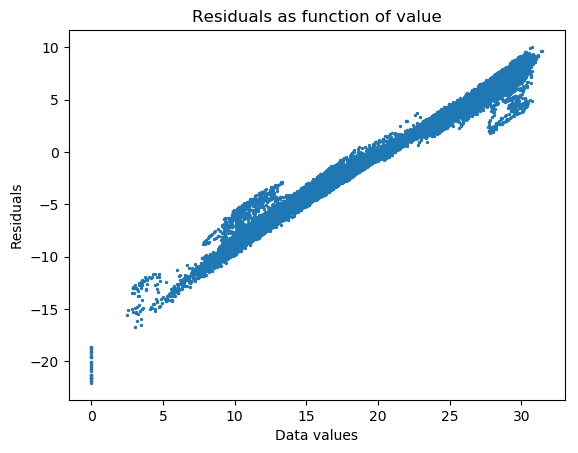

In [173]:
figure()
scatter(obsval,dataresiduals, s=2)
xlabel("Data values")
ylabel("Residuals")
title("Residuals as function of value");
     